## CPMSC 448 Homework 2
### Problem 4

#### Name: Boney Patel
#### PSU id: bkp5190 (901305942)


In this problem will use the Pima Indians Diabetes dataset from the UCI repository to experiment with the $k$-NN algorithm and find the optimal value for the number of neighbors  $k$. You do not need to implement the algorithm and encouraged to use the implementation in \texttt{scikit-learn}.


### a) 
Download the provided `Pima.csv` data file and load it using `pandas`. As a sanity check, make sure  there are 768 rows of data (potential diabetes patients) and 9 columns (8 input features including  `Pregnancies`, `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`, `DiabetesPedigreeFunction`, `Age`, and 1 target output). Note that the data file has no header and you might want to explicitly create the header. The last value in each row contains the target label for that row, and the remaining values are the features. Report the statics of each feature (min, max, average) and the histogram of the labels (target outputs).
    

Pregnancies statics 
 Min: 0 Max: 17 Average: 3.8450520833333335
Glucose statics 
 Min: 0 Max: 199 Average: 120.89453125
BloodPressure statics 
 Min: 0 Max: 122 Average: 69.10546875
SkinThickness statics 
 Min: 0 Max: 99 Average: 20.536458333333332
Insulin statics 
 Min: 0 Max: 846 Average: 79.79947916666667
BMI statics 
 Min: 0.0 Max: 67.1 Average: 31.992578124999977
DiabetesPedigreeFunction statics 
 Min: 0.078 Max: 2.42 Average: 0.4718763020833327
Age statics 
 Min: 21 Max: 81 Average: 33.240885416666664
[[<AxesSubplot:title={'center':'Pregnancies'}>
  <AxesSubplot:title={'center':'Glucose'}>
  <AxesSubplot:title={'center':'BloodPressure'}>]
 [<AxesSubplot:title={'center':'SkinThickness'}>
  <AxesSubplot:title={'center':'Insulin'}>
  <AxesSubplot:title={'center':'BMI'}>]
 [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>
  <AxesSubplot:title={'center':'Age'}>
  <AxesSubplot:title={'center':'Output'}>]]


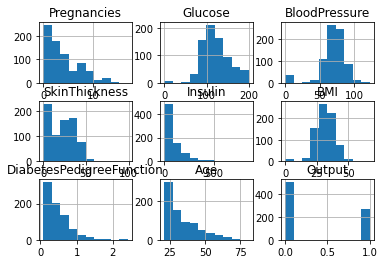

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max.columns', 100)
# to draw pictures in jupyter notebook
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Pima.csv')
#print("\n".join(df.columns))

pregAvg = df['Pregnancies'].mean()
pregMax = df['Pregnancies'].max()
pregMin = df['Pregnancies'].min()

print("Pregnancies statics \n Min:", pregMin, "Max:", pregMax, "Average:", pregAvg)

gluAvg = df['Glucose'].mean()
gluMax = df['Glucose'].max()
gluMin = df['Glucose'].min()

print("Glucose statics \n Min:", gluMin, "Max:", gluMax, "Average:", gluAvg)

bloodAvg = df['BloodPressure'].mean()
bloodMax = df['BloodPressure'].max()
bloodMin = df['BloodPressure'].min()

print("BloodPressure statics \n Min:", bloodMin, "Max:", bloodMax, "Average:", bloodAvg)

skinAvg = df['SkinThickness'].mean()
skinMax = df['SkinThickness'].max()
skinMin = df['SkinThickness'].min()

print("SkinThickness statics \n Min:", skinMin, "Max:", skinMax, "Average:", skinAvg)

insulAvg = df['Insulin'].mean()
insulMax = df['Insulin'].max()
insulMin = df['Insulin'].min()

print("Insulin statics \n Min:", insulMin, "Max:", insulMax, "Average:", insulAvg)

bmiAvg = df['BMI'].mean()
bmiMax = df['BMI'].max()
bmiMin = df['BMI'].min()

print("BMI statics \n Min:", bmiMin, "Max:", bmiMax, "Average:", bmiAvg)

diaAvg = df['DiabetesPedigreeFunction'].mean()
diaMax = df['DiabetesPedigreeFunction'].max()
diaMin = df['DiabetesPedigreeFunction'].min()

print("DiabetesPedigreeFunction statics \n Min:", diaMin, "Max:", diaMax, "Average:", diaAvg)

ageAvg = df['Age'].mean()
ageMax = df['Age'].max()
ageMin = df['Age'].min()

print("Age statics \n Min:", ageMin, "Max:", ageMax, "Average:", ageAvg)

histogram = df.hist()

print(histogram)

### b) 
Split the data into training and test data with 80\% training and 20\% test data sizes. 

Use 5-fold cross-validation on training data to decide the best number of neighbours $k$. To this end, you can use the built in functionality in  `scikit-learn` such as `cross_val_score`. For $k=1,2,3,\ldots, 15$ compute the 5-fold cross validation error and plot the results  (with values of $k$ on the $x$-axis and accuracy on the $y$-axis). Include the plot in your report and justify your decision for picking a particular number of neighbors $k$.

Test score: 0.721
[0.6791816606690657, 0.6987071837931494, 0.6970545115287218, 0.7296681327469012, 0.7492069838731173, 0.7540983606557378, 0.7508330001332799, 0.7540583766493403, 0.757297081167533, 0.7572704251632679, 0.7540450486472079, 0.757270425163268, 0.747527655604425, 0.7573104091696654, 0.7492069838731173]


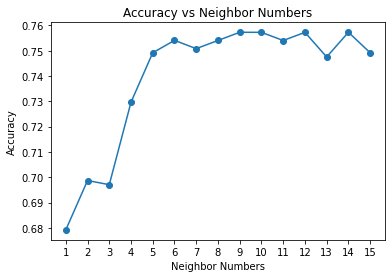

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

X = df.drop('Output', axis=1)
y = df['Output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

cross_val_scores = []
neighbors = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors = i)
    scores = cross_val_score(knn, X_train, y_train, cv = 5)
    cross_val_scores.append(np.mean(scores))
best_n_neighbors = neighbors[np.argmax(cross_val_scores)]
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors)
knn.fit(X_train,y_train)

print("Test score: {:.3f}".format(knn.score(X_test, y_test)))
print(cross_val_scores)

optimal = cross_val_scores.index(max(cross_val_scores))

plt.title("Accuracy vs Neighbor Numbers")
plt.xlabel("Neighbor Numbers")
plt.ylabel("Accuracy")
plt.plot(neighbors, cross_val_scores)
plt.scatter(neighbors, cross_val_scores)
plt.xticks(np.arange(min(neighbors), max(neighbors)+1, 1.0))


plt.show()

### c ) 
Evaluate the $k$-NN algorithm on test data with the optimal number of neighbours you obtained in previous step and report the test error.

Test score: 0.766
[0.7524990003998401]
Error:
0.24750099960015992


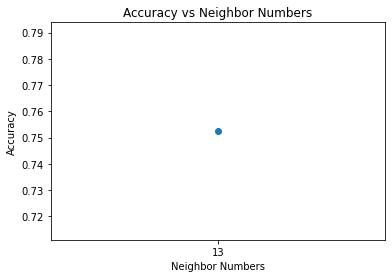

In [19]:
import numpy as np
import pandas as pd
pd.set_option('display.max.columns', 100)
# to draw pictures in jupyter notebook
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score 

df = pd.read_csv('Pima.csv')

y = np.array(df['Output'])
X = np.array(df.drop('Output',axis =1))

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

cross_val_scores =[]

neighbors = [optimal]
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors =i)
    scores = cross_val_score(knn, X_train, y_train, cv =5)
    cross_val_scores.append(np.mean(scores))
    
best_n_neighbors = neighbors[np.argmax(cross_val_scores)]
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors)
knn.fit(X_train, y_train)

maxA = max(cross_val_scores)
error = 1 - maxA; 

print("Test score: {:.3f}".format(knn.score(X_test, y_test)))
print(cross_val_scores)
print("Error:")
print(error)

plt.title("Accuracy vs Neighbor Numbers")
plt.xlabel("Neighbor Numbers")
plt.ylabel("Accuracy")
plt.plot(neighbors,cross_val_scores)
plt.scatter(neighbors,cross_val_scores)
plt.xticks(np.arange(min(neighbors), max(neighbors)+1, 1.0))


plt.show()

### d) 
Process the input data  by subtracting the mean (a.k.a. centralization) and dividing by the standard deviation (a.k.a. standardization) over each dimension (feature),  repeat the previous part and report the accuracy. Do centralization and standardization affect the accuracy? Why?

In [22]:
centstand = (df-df.mean()) / df.std()

# Display one column to see

centstand['Glucose'].mean()

# Yes centralization and standardization do affect accuracy as seen below

-4.1922484002772836e-18

Test score: 0.714
[0.696974543515927, 0.7181927229108356, 0.7328935092629616, 0.7133013461282154, 0.7328935092629614, 0.732906837265094, 0.739370918299347, 0.732826869252299, 0.7475009996001599, 0.7409702785552446, 0.7458883113421299, 0.7474876715980274, 0.7524057043849128, 0.75077968812475, 0.7605357856857257]


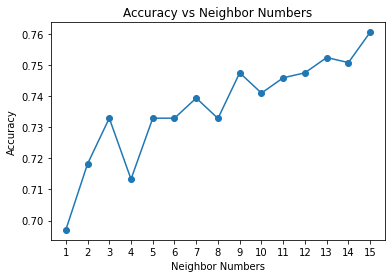

Test score: 0.766
[0.7328535252565641]
Error:
0.2671464747434359


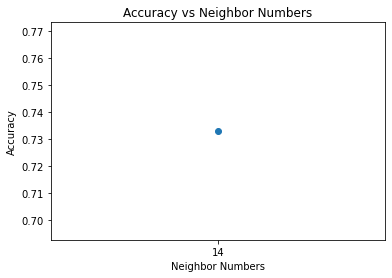

In [23]:
# This block puts together all of the previous code to compare centralization and standardization
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score 

centstand = (df-df.mean()) / df.std()

y = np.array(df['Output'])
X = np.array(centstand.drop('Output', axis=1))

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

cross_val_scores =[]

neighbors = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors =i)
    scores = cross_val_score(knn, X_train, y_train, cv =5)
    cross_val_scores.append(np.mean(scores))
    
best_n_neighbors = neighbors[np.argmax(cross_val_scores)]
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors)
knn.fit(X_train, y_train)
    
print("Test score: {:.3f}".format(knn.score(X_test, y_test)))
print(cross_val_scores)

optimal = cross_val_scores.index(max(cross_val_scores))

plt.title("Accuracy vs Neighbor Numbers")
plt.xlabel("Neighbor Numbers")
plt.ylabel("Accuracy")
plt.plot(neighbors, cross_val_scores)
plt.scatter(neighbors, cross_val_scores)
plt.xticks(np.arange(min(neighbors), max(neighbors)+1, 1.0))


plt.show()

# split 

y = np.array(df['Output'])
X = np.array(df.drop('Output',axis =1))

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

cross_val_scores =[]

neighbors = [optimal]
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors =i)
    scores = cross_val_score(knn, X_train, y_train, cv =5)
    cross_val_scores.append(np.mean(scores))
    
best_n_neighbors = neighbors[np.argmax(cross_val_scores)]
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors)
knn.fit(X_train, y_train)
    
maxA = max(cross_val_scores)
error = 1 - maxA; 

print("Test score: {:.3f}".format(knn.score(X_test, y_test)))
print(cross_val_scores)
print("Error:")
print(error)

plt.title("Accuracy vs Neighbor Numbers")
plt.xlabel("Neighbor Numbers")
plt.ylabel("Accuracy")
plt.plot(neighbors,cross_val_scores)
plt.scatter(neighbors,cross_val_scores)
plt.xticks(np.arange(min(neighbors), max(neighbors)+1, 1.0))


plt.show()